In [1]:
# import neccessary librarries

import numpy as np    #‘numpy’ library to do numerical operations.
import pandas as pd   #library to work with dataframes
import matplotlib.pyplot as plt  #to create 2D graphs and plots 
import seaborn as sns  #provides a high-level interface for drawing attractive and informative statistical graphics

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading of the data
df=pd.read_table("train_data.csv",delimiter=',') #file data is get uploaded in df dataframe.

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df.shape

(318438, 18)

# EDA

In [5]:
#Give all the description about the number of entry in each columns, is there any missing value, dtype of the data, its kind of 
#It give the overall good understanding of the data type and the null value of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
df['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [7]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [8]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
df=df.drop(['case_id','Hospital_region_code','patientid'],axis=1)

Lets Draw some plot and get better understanding of the data.

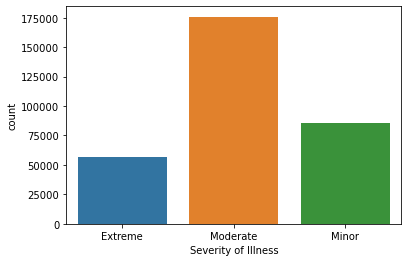

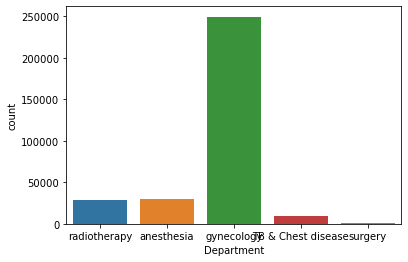

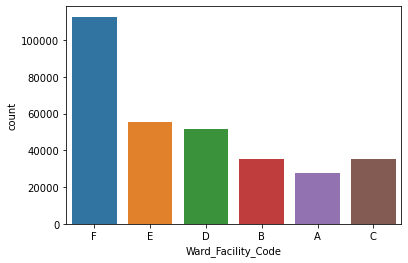

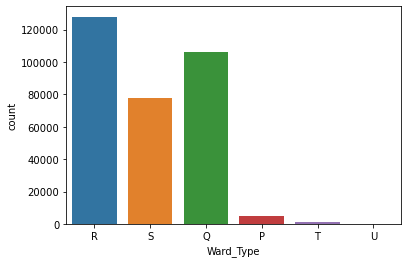

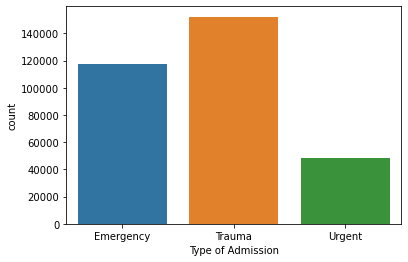

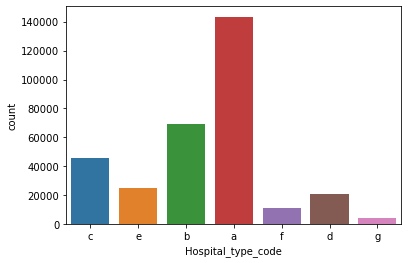

In [10]:
import seaborn as sns
sns.countplot(df['Severity of Illness'],label="Count")
plt.show()
sns.countplot(df['Department'],label="Count")
plt.show()
sns.countplot(df['Ward_Facility_Code'],label="Count")
plt.show()
sns.countplot(df['Ward_Type'],label="Count")
plt.show()
sns.countplot(df['Type of Admission'],label="Count")
plt.show()
sns.countplot(df['Hospital_type_code'],label="Count")
plt.show()



From the above plot we can interpret that IN the departement section some departement have lower admission this ocde be the reason becaise normal pergancy case may have higher. sowe will consider the argument as it is. after checking model accurcay we will try to modify it later on.

ploting for numerical function

Hospital_code                           AxesSubplot(0.125,0.125;0.0945122x0.755)
City_Code_Hospital                   AxesSubplot(0.238415,0.125;0.0945122x0.755)
Available Extra Rooms in Hospital    AxesSubplot(0.351829,0.125;0.0945122x0.755)
Bed Grade                            AxesSubplot(0.465244,0.125;0.0945122x0.755)
City_Code_Patient                    AxesSubplot(0.578659,0.125;0.0945122x0.755)
Visitors with Patient                AxesSubplot(0.692073,0.125;0.0945122x0.755)
Admission_Deposit                    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

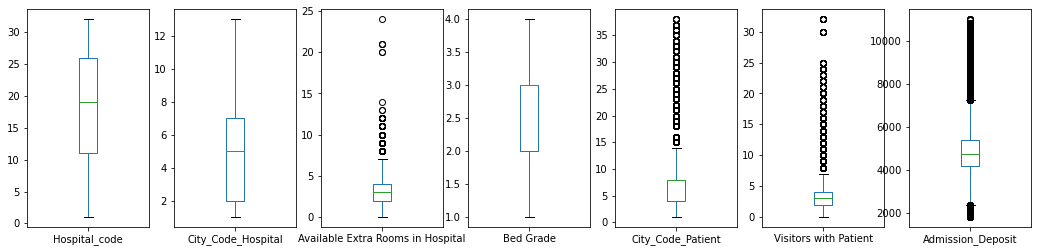

In [11]:
df.plot(kind='box',subplots=True,sharex=False, sharey=False, figsize=(18,4))

We can see there are many outlier are seen in extra room, city_code_patinet_visitors,admission_deposit.
Outlier affect many algoritm like knn, svm, logistic, therefore we have to take care of this,
I guess all the outlier value seems normal for me, except the visitors with patients. Because more than 10 visiots is not usual. so applu some feature engineering here.

In [12]:
# #removing the outlier in 'visitors with pateints'
# upper_lim = df['Visitors with Patient'].quantile(.95)
# # lower_lim = data['column'].quantile(.05)

# df['Visitors with Patient'] = df[(df['Visitors with Patient'] < upper_lim)]


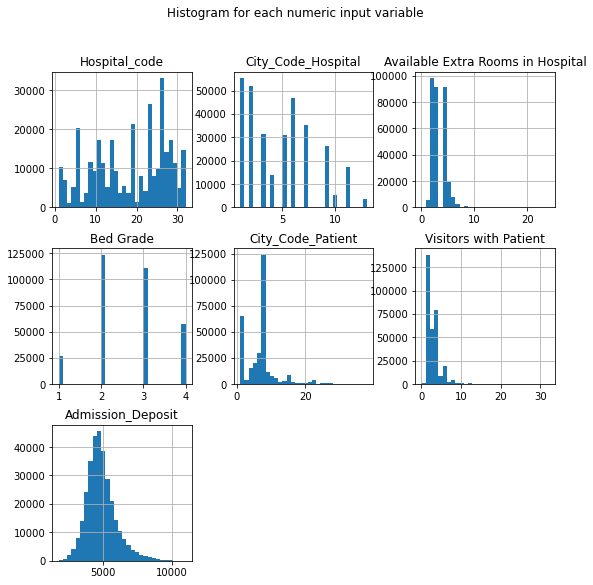

In [13]:
df.drop('Severity of Illness' ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Severity of Illness')
plt.show()

In [14]:
#BY seeing the above plot, we can also drop pateins Id, it dont making any any help in prediction.

In [15]:
#df.drop('patientid',axis=1,inplace=True)

In [16]:
#sns.boxplot(x='Type of Admission',y=df['Admission_Deposit'],hue='Severity of Illness',data=df)

Above ploting indicate that admission deposit is somehow same in all admission category with all type of illness.So we won't do any transformation, Data available is good

In [17]:
#***To check the dsitribution of the data, if data is too much skewed we can apply log Transform/ or to reduce the expension we
#can use min max scaler***
#sns.distplot(df['City_Code_Patient'])

In [18]:
#City code pateints data is skewed, so we will apply transfromation over it.
#df['City_Code_Patient']=np.log(df['City_Code_Patient'])
#sns.distplot(df['City_Code_Patient'])

In [19]:
# lower_lim = df['City_Code_Patient'].quantile(.05)
# df['City_Code_Patient'] = df[(df['City_Code_Patient'] > lower_lim)]

In [20]:
#sns.distplot(df['City_Code_Patient'])

In [21]:
# Check the dependency of the varibale to the target variable.
# but before that we need to convert the target varibale in numerical form, apply labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Severity of Illness'] = le.fit_transform(df['Severity of Illness'])

# Visualization

<AxesSubplot:>

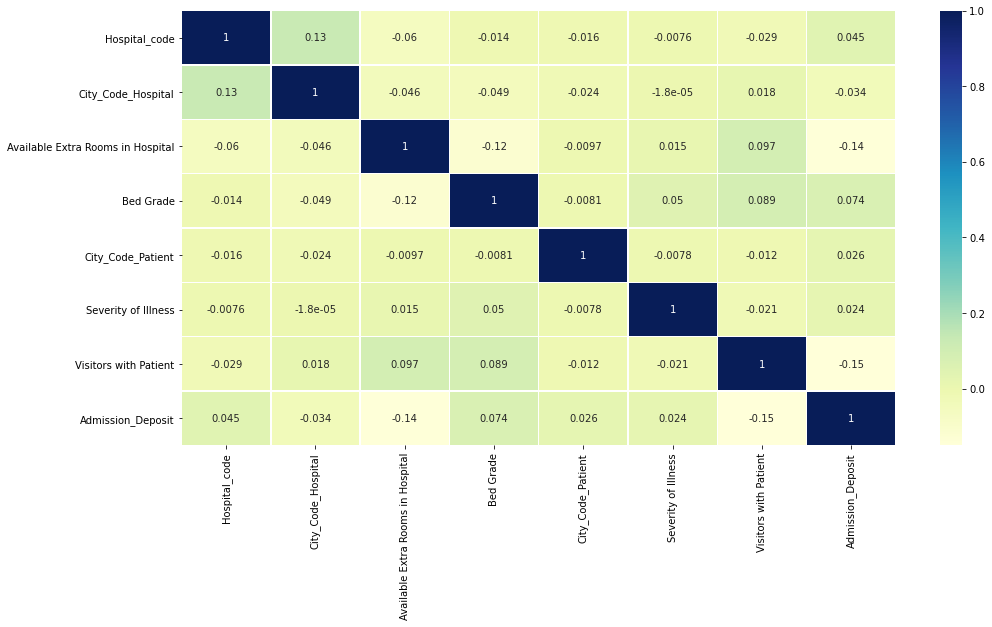

In [22]:
df_corr=df.corr()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_corr,cmap="YlGnBu", annot=True,linewidths=.5, ax=ax)

There is not feature who affecting the targte varibale, so chances of data leakage from multicollinearity is very less.
logistic,knn, nave bayes is affected by multicolinearity

In [23]:
# sns.pairplot(df, kind="scatter", hue="Severity of Illness") 
# plt.show()

# Data preprocessing:

In [24]:
#check the duplicated values
duplicates = df.duplicated()
duplicates[duplicates==False]

0         False
1         False
2         False
3         False
4         False
          ...  
318433    False
318434    False
318435    False
318436    False
318437    False
Length: 318286, dtype: bool

No duplictaes

In [25]:
df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [26]:
#df.Age.u
df['Age']=df['Age'].replace(to_replace =["51-60", "71-80",'31-40', '41-50', '81-90', '61-70', '21-30', '11-20',
       '0-10', '91-100'], 
                            value =[55,75,35,45,85,65,25,15,5,95])

In [27]:
df['Age'].unique()

array([55, 75, 35, 45, 85, 65, 25, 15,  5, 95], dtype=int64)

In [28]:
df['Stay']=df['Stay'].replace(to_replace =['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], 
                            value =[5,45,35,15,55,25,75,105,85,65,95])
df.Stay.unique()

array([  5,  45,  35,  15,  55,  25,  75, 105,  85,  65,  95], dtype=int64)

In [29]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,3,radiotherapy,R,F,2.0,7.0,Emergency,0,2,55,4911.0,5
1,2,c,5,2,radiotherapy,S,F,2.0,7.0,Trauma,0,2,55,5954.0,45
2,10,e,1,2,anesthesia,S,E,2.0,7.0,Trauma,0,2,55,4745.0,35
3,26,b,2,2,radiotherapy,R,D,2.0,7.0,Trauma,0,2,55,7272.0,45
4,26,b,2,2,radiotherapy,S,D,2.0,7.0,Trauma,0,2,55,5558.0,45


# One hot encoding

In [30]:
df=pd.get_dummies(data=df,columns=['Hospital_type_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission'])
df.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,8,3,3,2.0,7.0,0,2,55,4911.0,5,...,0,0,0,0,0,0,1,1,0,0
1,2,5,2,2.0,7.0,0,2,55,5954.0,45,...,0,0,0,0,0,0,1,0,1,0
2,10,1,2,2.0,7.0,0,2,55,4745.0,35,...,0,0,0,0,0,1,0,0,1,0
3,26,2,2,2.0,7.0,0,2,55,7272.0,45,...,0,0,0,0,1,0,0,0,1,0
4,26,2,2,2.0,7.0,0,2,55,5558.0,45,...,0,0,0,0,1,0,0,0,1,0


In [31]:
y=df['Severity of Illness']
X=df.drop('Severity of Illness',axis=1)
X.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,8,3,3,2.0,7.0,2,55,4911.0,5,0,...,0,0,0,0,0,0,1,1,0,0
1,2,5,2,2.0,7.0,2,55,5954.0,45,0,...,0,0,0,0,0,0,1,0,1,0
2,10,1,2,2.0,7.0,2,55,4745.0,35,0,...,0,0,0,0,0,1,0,0,1,0
3,26,2,2,2.0,7.0,2,55,7272.0,45,0,...,0,0,0,0,1,0,0,0,1,0
4,26,2,2,2.0,7.0,2,55,5558.0,45,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Imputation

In [33]:
#Since % of bed Grade is very less ,therefore we can drop these.
df.dropna(subset=['Bed Grade'],axis=0,inplace=True)

In [34]:
X_train.isnull().sum()

Hospital_code                           0
City_Code_Hospital                      0
Available Extra Rooms in Hospital       0
Bed Grade                              89
City_Code_Patient                    3410
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
Hospital_type_code_a                    0
Hospital_type_code_b                    0
Hospital_type_code_c                    0
Hospital_type_code_d                    0
Hospital_type_code_e                    0
Hospital_type_code_f                    0
Hospital_type_code_g                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                       

In [35]:
X_test.isnull().sum()

Hospital_code                           0
City_Code_Hospital                      0
Available Extra Rooms in Hospital       0
Bed Grade                              24
City_Code_Patient                    1122
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
Hospital_type_code_a                    0
Hospital_type_code_b                    0
Hospital_type_code_c                    0
Hospital_type_code_d                    0
Hospital_type_code_e                    0
Hospital_type_code_f                    0
Hospital_type_code_g                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                       

In [36]:
#df.describe()

In [38]:
#To avoid data leakge
X_train.loc[:,'City_Code_Patient']=X_train.fillna(X_train.loc[:,'City_Code_Patient'].mean())
X_train.isnull().sum()

C:\Users\Manager\Anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


Hospital_code                         0
City_Code_Hospital                    0
Available Extra Rooms in Hospital     0
Bed Grade                            89
City_Code_Patient                     0
Visitors with Patient                 0
Age                                   0
Admission_Deposit                     0
Stay                                  0
Hospital_type_code_a                  0
Hospital_type_code_b                  0
Hospital_type_code_c                  0
Hospital_type_code_d                  0
Hospital_type_code_e                  0
Hospital_type_code_f                  0
Hospital_type_code_g                  0
Department_TB & Chest disease         0
Department_anesthesia                 0
Department_gynecology                 0
Department_radiotherapy               0
Department_surgery                    0
Ward_Type_P                           0
Ward_Type_Q                           0
Ward_Type_R                           0
Ward_Type_S                           0


In [39]:
#To avoid data leakge
X_train.loc[:,'Bed Grade']=X_train.fillna(X_train.loc[:,'Bed Grade'].mean())
X_train.isnull().sum()

Hospital_code                        0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Patient                    0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
Hospital_type_code_a                 0
Hospital_type_code_b                 0
Hospital_type_code_c                 0
Hospital_type_code_d                 0
Hospital_type_code_e                 0
Hospital_type_code_f                 0
Hospital_type_code_g                 0
Department_TB & Chest disease        0
Department_anesthesia                0
Department_gynecology                0
Department_radiotherapy              0
Department_surgery                   0
Ward_Type_P                          0
Ward_Type_Q                          0
Ward_Type_R                          0
Ward_Type_S                          0
Ward_Type_T              

In [40]:
#for test
X_test.loc[:,'City_Code_Patient']=X_test.fillna(X_test.loc[:,'City_Code_Patient'].mean())
X_test.loc[:,'Bed Grade']=X_test.fillna(X_test.loc[:,'Bed Grade'].mean())

In [41]:
X_test.isnull().sum()

Hospital_code                        0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Patient                    0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
Hospital_type_code_a                 0
Hospital_type_code_b                 0
Hospital_type_code_c                 0
Hospital_type_code_d                 0
Hospital_type_code_e                 0
Hospital_type_code_f                 0
Hospital_type_code_g                 0
Department_TB & Chest disease        0
Department_anesthesia                0
Department_gynecology                0
Department_radiotherapy              0
Department_surgery                   0
Ward_Type_P                          0
Ward_Type_Q                          0
Ward_Type_R                          0
Ward_Type_S                          0
Ward_Type_T              

In [42]:
X_train.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
count,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000,...,238828.000000,238828.000000,238828.000000,238828.000000,238828.00000,238828.000000,238828.000000,238828.000000,238828.000000,238828.000000
mean,18.289020,4.771522,3.198565,2.626307,18.289020,3.282831,46.255129,4879.589847,31.965934,0.450621,...,0.000029,0.087339,0.110523,0.110883,0.16238,0.173929,0.354946,0.369111,0.478968,0.151921
std,8.639847,3.100906,1.167779,0.872441,8.639847,1.764003,18.870442,1085.214270,21.468239,0.497557,...,0.005414,0.282332,0.313541,0.313988,0.36880,0.379049,0.478498,0.482565,0.499559,0.358945
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,1800.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,2.000000,2.000000,11.000000,2.000000,35.000000,4184.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,5.000000,3.000000,3.000000,19.000000,3.000000,45.000000,4742.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,7.000000,4.000000,3.000000,26.000000,4.000000,55.000000,5406.000000,35.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
max,32.000000,13.000000,24.000000,4.000000,32.000000,32.000000,95.000000,11008.000000,105.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MOdels

# Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.47


In [45]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(X_train, y_train)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'
#      .format(knn.score(X_test, y_test)))

KeyboardInterrupt: 

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
print('Accuracy of random classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of random classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of random classifier on training set: 1.00
Accuracy of random classifier on test set: 0.57


In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.53
Accuracy of GNB classifier on test set: 0.52


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))